Classification of soybean genotypes in drought and saline stress environment using Decision Tree algorithm

Classify the samples as belonging to the control or stress group (Drought, Saline). Such a model will make it possible to identify whether the plant has suffered any type of stress such as drought or excess salt.


In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, SVG
from graphviz import Source
from sklearn.tree import export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC



In [2]:
'''
Read data and Create dataset
'''
df = pd.read_csv('data_classification.csv')

y = np.array(df['CLASS'])
Cultivar = np.array(df['CULTIVAR'])
del df['CLASS']
del df['CULTIVAR']
X = np.array(df, dtype=np.float32)

In [3]:
df.shape

(552, 7)

In [4]:
df.isnull().sum()

GERM    0
SL      0
RL      0
TL      0
SDM     0
RDM     0
TDM     0
dtype: int64

In [5]:
'''
Check the best parameters
Extracted cross-validation was used to prevent a sample of the same genotype from being in both the training set and the test set.
'''
param_grid = {'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']}

group_kfold = GroupKFold(n_splits=10)

K = 1
for train_index, test_index in group_kfold.split(X, y, Cultivar):
  print('Fold %i' %K)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  clf = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy')
  clf.fit(X_train, y_train)

  print(clf.best_params_)
  print(clf.best_score_)

  K = K + 1

Fold 1


{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.9615102040816325
Fold 2
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.9593877551020409
Fold 3
{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.9534285714285712
Fold 4
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.957469387755102
Fold 5
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.961591836734694
Fold 6
{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.9555102040816326
Fold 7
{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.9524705882352942
Fold 8
{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.9623529411764705
Fold 9
{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.9622745098039216
Fold 10
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.954392156862745


In [6]:
'''
Random Forest with fixed parameter, over 10-fold, using the measures of accuracy, precision and recall and confusion matrix
'''
K = 1

acc_train = []
acc_test  = []

pr_train = []
pr_test  = []

re_train = []
re_test  = []

mc_train = []
mc_test  = []

train_indices = []
test_indices  = []

group_kfold = GroupKFold(n_splits=10)

for train_index, test_index in group_kfold.split(X, y, Cultivar):
  print('Fold %i' %K)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  train_indices.append(train_index)
  test_indices.append(test_index)

  clf = SVC(kernel='linear', C=10, gamma='scale', random_state=0)
  clf.fit(X_train, y_train)

  y_pred_train = clf.predict(X_train)
  y_pred_test  = clf.predict(X_test)

  r_acc_train = accuracy_score(y_train, y_pred_train)
  r_acc_test  = accuracy_score(y_test, y_pred_test)
  acc_train.append(r_acc_train)
  acc_test.append(r_acc_test )

  r_pr_train = precision_score(y_train, y_pred_train, average='weighted')
  r_pr_test  = precision_score(y_test, y_pred_test, average='weighted')
  pr_train.append(r_pr_train)
  pr_test.append(r_pr_test)

  r_re_train = recall_score(y_train, y_pred_train, average='weighted')
  r_re_test  = recall_score(y_test, y_pred_test, average='weighted')
  re_train.append(r_re_train)
  re_test.append(r_re_test)

  r_mc_train = confusion_matrix(y_train, y_pred_train)
  r_mc_test  = confusion_matrix(y_test, y_pred_test)
  mc_train.append(r_mc_train)
  mc_test.append(r_mc_test)

  print('\t Training: ')
  print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(r_acc_train, r_pr_train, r_re_train))
  print('\t Test: ')
  print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(r_acc_test, r_pr_test, r_re_test))

  K = K + 1

acc_train = np.array(acc_train)
acc_test  = np.array(acc_test)

pr_train = np.array(pr_train)
pr_test  = np.array(pr_test)

re_train = np.array(re_train)
re_test  = np.array(re_test)

mc_train = np.array(mc_train)
mc_test  = np.array(mc_test )

print('\n')
print('Average - Training')
print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(acc_train.mean(), pr_train.mean(), re_train.mean()))
print('Average - Test')
print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(acc_test.mean(), pr_test.mean(), re_test.mean()))

Fold 1
	 Training: 
	 Acc: 0.9736 - Pr: 0.9738 - Re: 0.9736
	 Test: 
	 Acc: 0.9500 - Pr: 0.9507 - Re: 0.9500
Fold 2
	 Training: 
	 Acc: 0.9817 - Pr: 0.9817 - Re: 0.9817
	 Test: 
	 Acc: 0.9500 - Pr: 0.9565 - Re: 0.9500
Fold 3
	 Training: 
	 Acc: 0.9715 - Pr: 0.9717 - Re: 0.9715
	 Test: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
Fold 4
	 Training: 
	 Acc: 0.9736 - Pr: 0.9736 - Re: 0.9736
	 Test: 
	 Acc: 0.9667 - Pr: 0.9667 - Re: 0.9667
Fold 5
	 Training: 
	 Acc: 0.9756 - Pr: 0.9756 - Re: 0.9756
	 Test: 
	 Acc: 0.9500 - Pr: 0.9507 - Re: 0.9500
Fold 6
	 Training: 
	 Acc: 0.9736 - Pr: 0.9737 - Re: 0.9736
	 Test: 
	 Acc: 0.9667 - Pr: 0.9667 - Re: 0.9667
Fold 7
	 Training: 
	 Acc: 0.9722 - Pr: 0.9723 - Re: 0.9722
	 Test: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
Fold 8
	 Training: 
	 Acc: 0.9742 - Pr: 0.9742 - Re: 0.9742
	 Test: 
	 Acc: 0.9583 - Pr: 0.9583 - Re: 0.9583
Fold 9
	 Training: 
	 Acc: 0.9782 - Pr: 0.9783 - Re: 0.9782
	 Test: 
	 Acc: 0.9375 - Pr: 0.9474 - Re: 0.9375
Fold 10
	 Training:

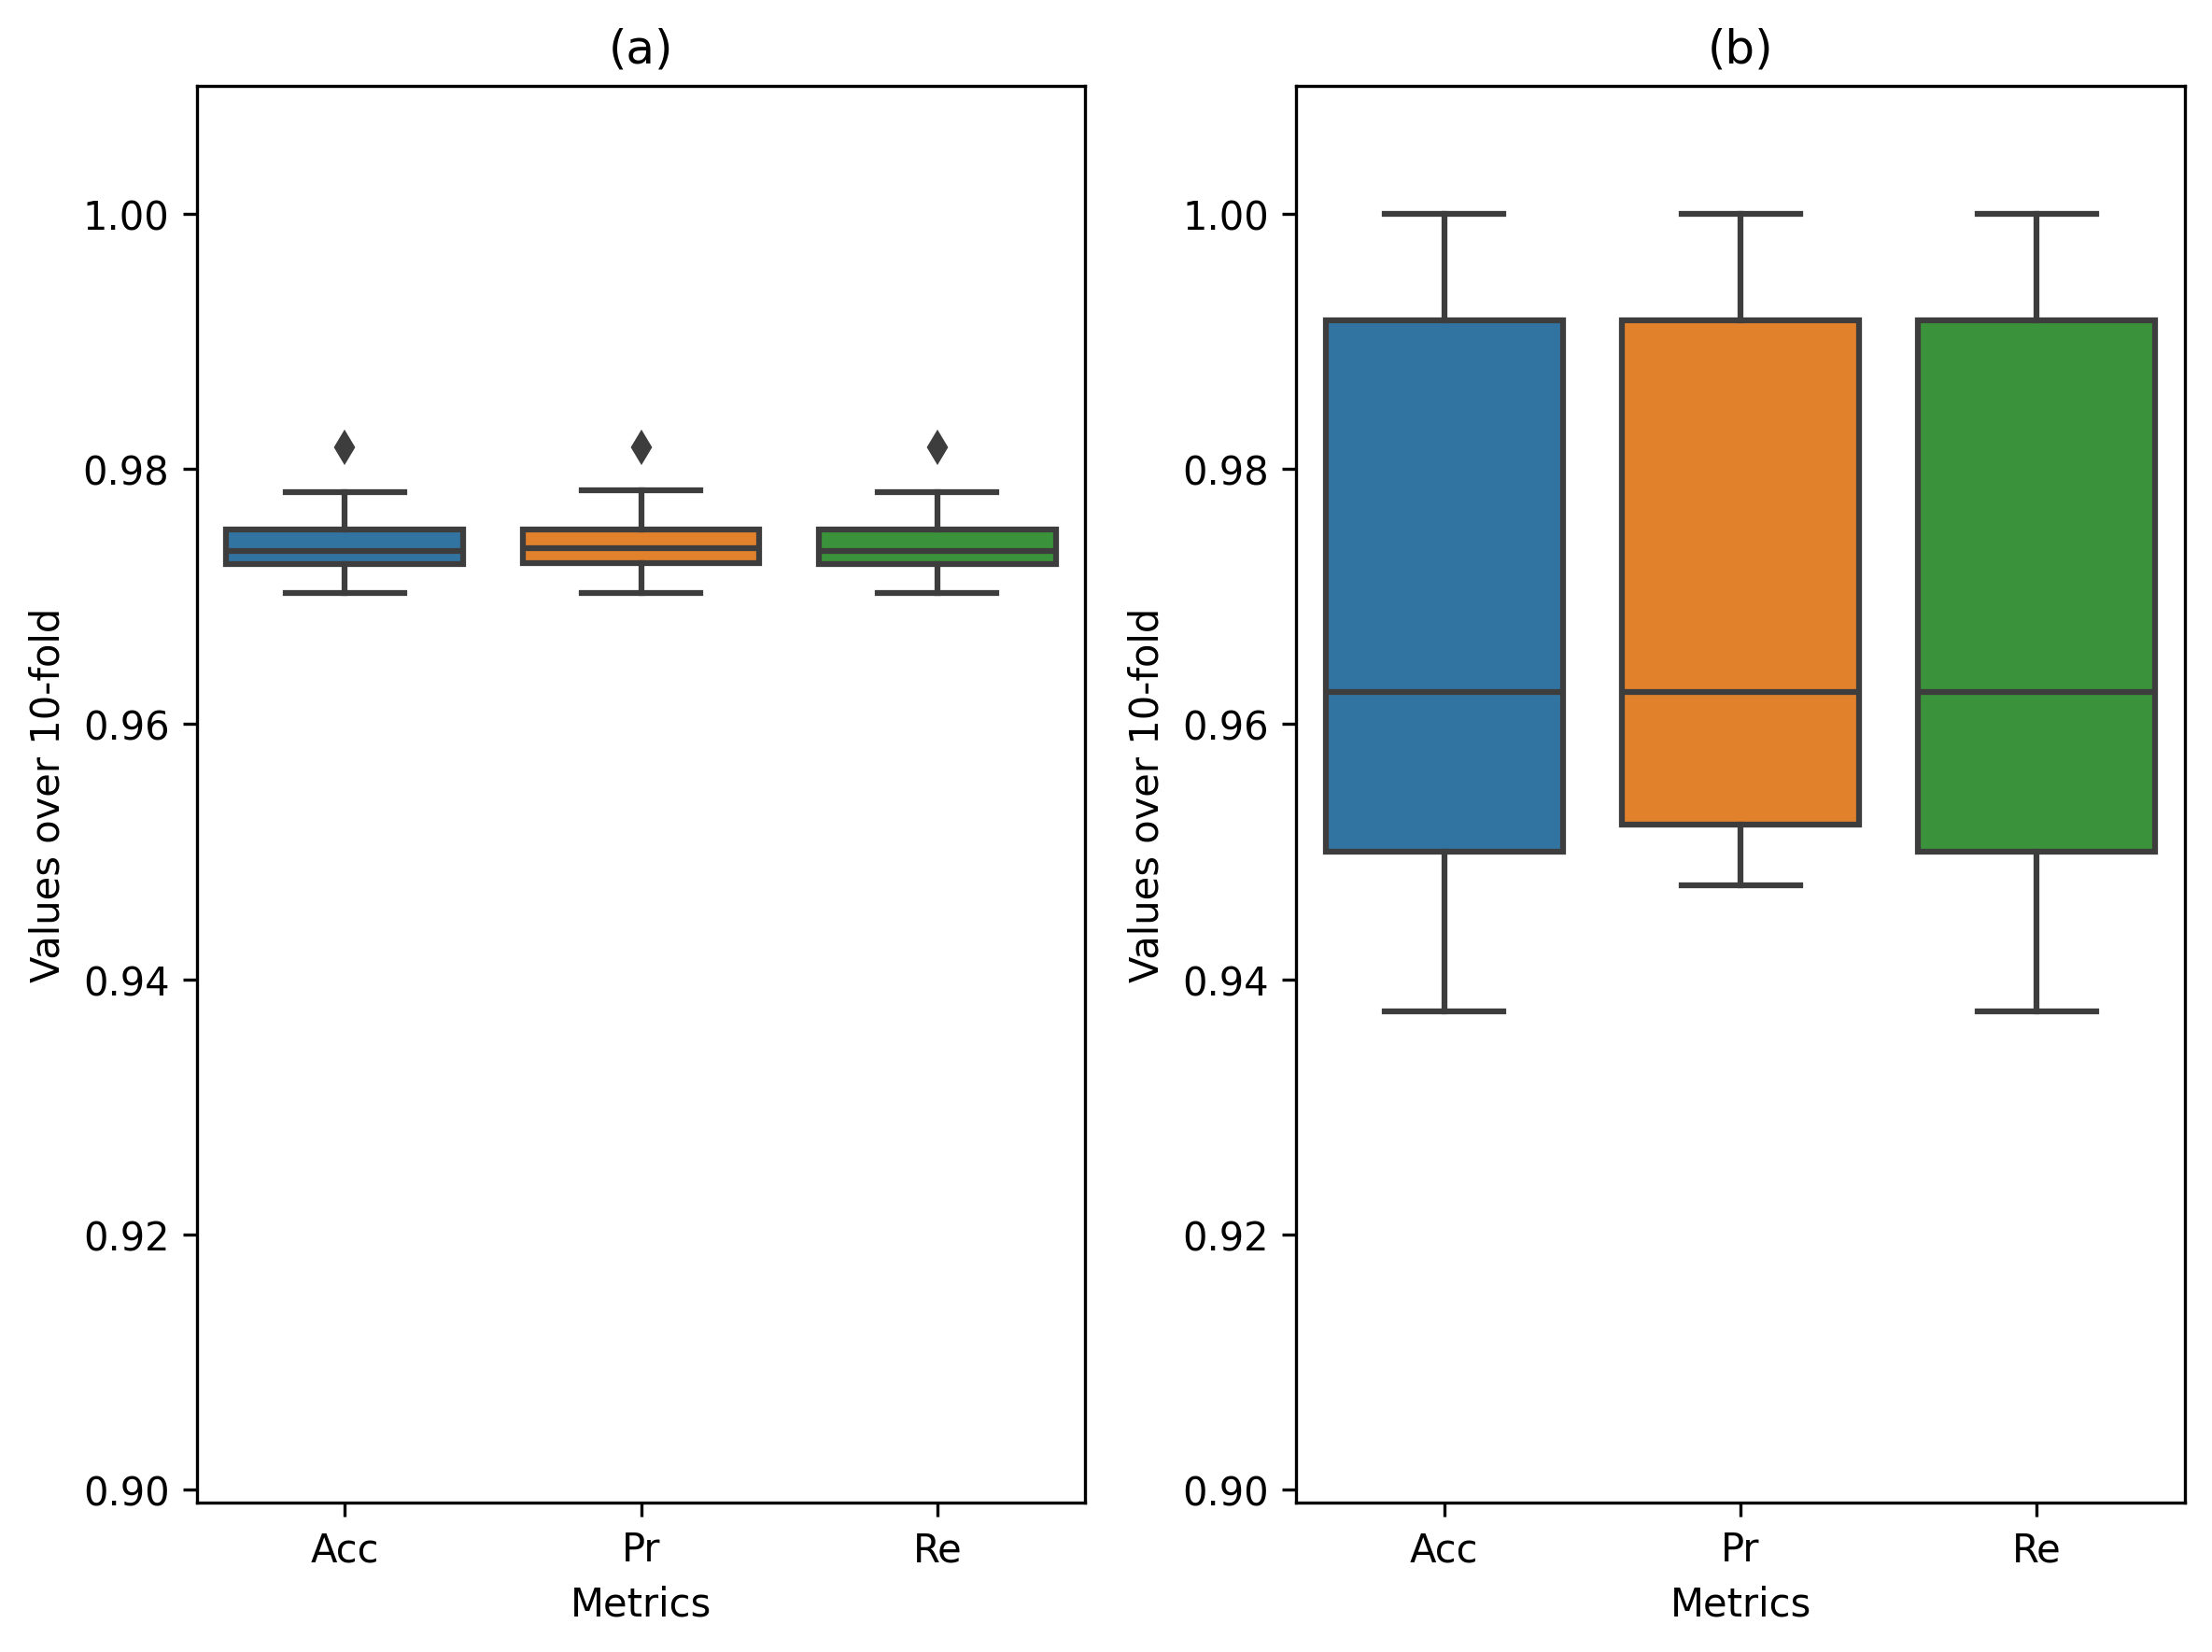

In [7]:
df_train = pd.DataFrame()
df_train['Acc'] = acc_train
df_train['Pr']  = pr_train
df_train['Re']  = re_train

df_test = pd.DataFrame()
df_test['Acc'] = acc_test
df_test['Pr']  = pr_test
df_test['Re']  = re_test

plt.figure(dpi=300, figsize=(8,6))
plt.subplot(121)
plt.title('(a)')
sns.boxplot(data=df_train)
plt.ylim((0.899, 1.01))
plt.xlabel('Metrics')
plt.ylabel('Values over 10-fold')
plt.subplot(122)
plt.title('(b)')
sns.boxplot(data=df_test)
plt.ylim((0.899, 1.01))
plt.xlabel('Metrics')
plt.ylabel('Values over 10-fold')
plt.tight_layout()
plt.show()

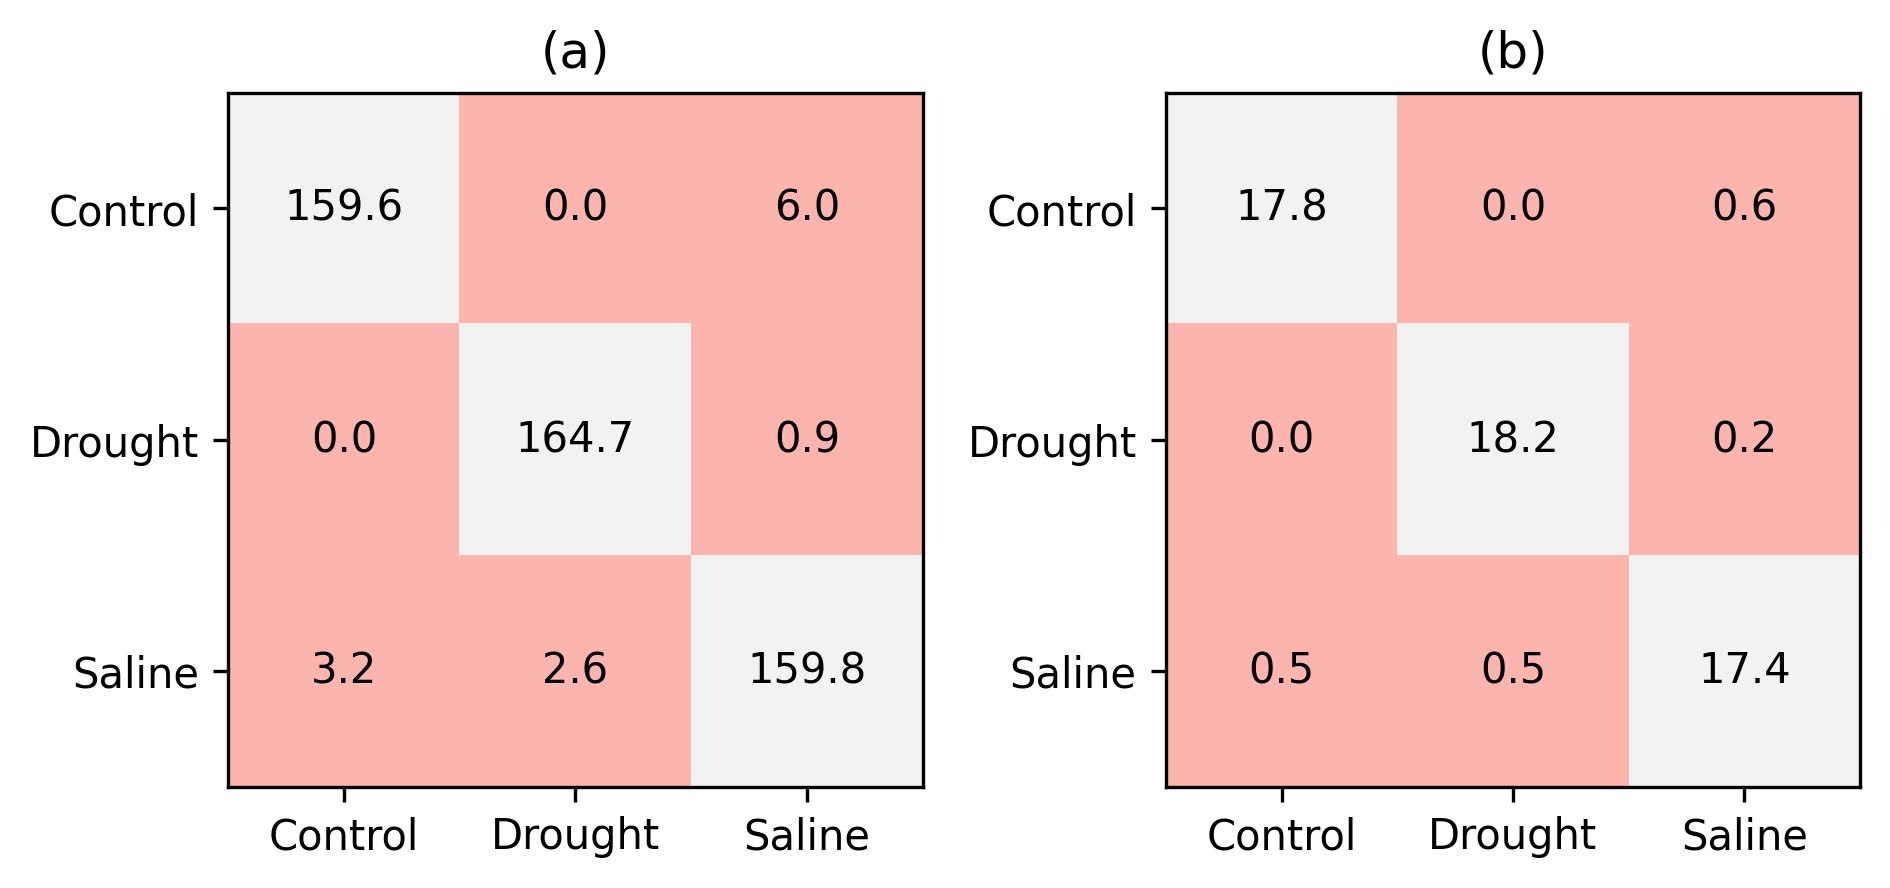

In [8]:
'''
Plot the average confusion matrix
'''
classes = ["Control", "Drought", "Saline"]

MC_train = np.mean(mc_train, axis=0)
MC_test  = np.mean(mc_test, axis=0)

fig = plt.figure(dpi=300)
plt.subplot(121)
plt.imshow(MC_train, cmap='Pastel1')
plt.title('(a)')
plt.xticks(np.arange(len(classes)), labels=classes)
plt.yticks(np.arange(len(classes)), labels=classes)

# Loop over data dimensions and create text annotations.
for k in range(len(classes)):
    for j in range(len(classes)):
        text = plt.text(j, k, MC_train[k, j], ha="center", va="center", color="k")

plt.subplot(122)
plt.imshow(MC_test, cmap='Pastel1')
plt.title('(b)')
plt.xticks(np.arange(len(classes)), labels=classes)
plt.yticks(np.arange(len(classes)), labels=classes)

# Loop over data dimensions and create text annotations.
for k in range(len(classes)):
    for j in range(len(classes)):
        text = plt.text(j, k, MC_test[k, j], ha="center", va="center", color="k")

fig.tight_layout()
plt.show()

In [9]:
'''
Checks which cultivars generate the most prediction errors
'''

Cultivars_errs_train = []
Cultivars_errs_test = []

group_kfold = GroupKFold(n_splits=10)

for train_index, test_index in group_kfold.split(X, y, Cultivar):

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  train_indices.append(train_index)
  test_indices.append(test_index)

  clf = SVC(kernel='linear', C=10, gamma='scale', random_state=0)
  clf.fit(X_train, y_train)

  for i, x_train in enumerate(X_train):
    y_pred_train = clf.predict(x_train.reshape(1, -1))[0]
    if y_pred_train != y_train[i]:
      Cultivars_errs_train.append([Cultivar[train_index[i]], y_train[i], y_pred_train])

  for i, x_test in enumerate(X_test):
    y_pred_test = clf.predict(x_test.reshape(1, -1))[0]
    if y_pred_test != y_test[i]:
      Cultivars_errs_test.append([Cultivar[test_index[i]], y_test[i], y_pred_test])

In [10]:
Cultivares_errs_train_ = []
last_cultivar = None
for cultivar in Cultivars_errs_train:
  if cultivar != last_cultivar:
    Cultivares_errs_train_.append(cultivar)
    last_cultivar = cultivar

Cultivares_errs_train_ = np.array(Cultivares_errs_train_)
Cultivares_errs_name_train = list(Cultivares_errs_train_[:,0])

Cultivares_errs_test_ = []
last_cultivar = None
for cultivar in Cultivars_errs_test:
  if cultivar != last_cultivar:
    Cultivares_errs_test_.append(cultivar)
    last_cultivar = cultivar

Cultivares_errs_test_ = np.array(Cultivares_errs_test_)
Cultivares_errs_name_test = list(Cultivares_errs_test_[:,0])

In [11]:
print('Cultivars with more prediction errors')

print('> Training')
for cultivar in Cultivares_errs_name_train:
  print(cultivar, ': ', Cultivares_errs_name_train.count(cultivar), ' # ', end='')

print('\n> Test')
for cultivar in Cultivares_errs_name_test:
  print(cultivar, ': ', Cultivares_errs_name_test.count(cultivar), ' # ', end='')

Cultivars with more prediction errors
> Training
5D 615 RR :  9  # 5G 830 RR :  8  # CD 238 RR :  7  # DESAFIO RR :  18  # FPS solimoes RR :  8  # NS 6909 IPRO :  1  # 5G 770 RR :  9  # AS 3575 IPRO :  8  # FPS Paranapanema RR :  9  # DESAFIO RR :  18  # 5D 6215 IPRO :  9  # DESAFIO RR :  18  # FPS solimoes RR :  8  # 5G 770 RR :  9  # AS 3575 IPRO :  8  # FPS Paranapanema RR :  9  # PONTA IPRO :  9  # DESAFIO RR :  18  # 5D 615 RR :  9  # 5D 6215 IPRO :  9  # 5G 830 RR :  8  # CD 238 RR :  7  # DESAFIO RR :  18  # FPS solimoes RR :  8  # 5G 770 RR :  9  # AS 3575 IPRO :  8  # FPS Paranapanema RR :  9  # PONTA IPRO :  9  # DESAFIO RR :  18  # 5D 615 RR :  9  # 5D 6215 IPRO :  9  # 5G 830 RR :  8  # CD 238 RR :  7  # DESAFIO RR :  18  # 5G 770 RR :  9  # FPS Paranapanema RR :  9  # PONTA IPRO :  9  # DESAFIO RR :  18  # 5D 615 RR :  9  # 5D 6215 IPRO :  9  # 5G 830 RR :  8  # FPS solimoes RR :  8  # 5G 770 RR :  9  # AS 3575 IPRO :  8  # FPS Paranapanema RR :  9  # PONTA IPRO :  9  # 5D

In [21]:
importances = []
group_kfold = GroupKFold(n_splits=10)

for train_index, test_index in group_kfold.split(X, y, Cultivar):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = SVC(kernel='linear', C=10, gamma='scale', random_state=0)
    clf.fit(X_train, y_train)

    if clf.kernel == 'linear':
        feature_importance = clf.coef_[0]
        # Absolute values of coefficients represent feature importance
        feature_importance = abs(feature_importance)
        importances.append(feature_importance)
    print(feature_importance)

[0.08130204 0.14634367 0.00406512 0.15040877 0.13414841 0.02439059
 0.10975779]
[0.0056986  0.05114996 0.00763952 0.05878947 0.1106981  0.02810087
 0.08136967]
[0.08130204 0.14634367 0.00406512 0.15040877 0.13414841 0.02439059
 0.10975779]
[0.04352073 0.05222487 0.01088018 0.06310505 0.12621015 0.00870416
 0.13709029]
[0.08130205 0.14634368 0.00406512 0.15040878 0.13414842 0.02439059
 0.10975779]
[0.08130204 0.14634367 0.00406512 0.15040877 0.13414841 0.02439059
 0.10975779]
[0.08130204 0.14634367 0.00406512 0.15040877 0.13414841 0.02439059
 0.10975779]
[0.08130204 0.14634367 0.00406512 0.15040877 0.13414841 0.02439059
 0.10975779]
[0.08130204 0.14634367 0.00406512 0.15040877 0.13414841 0.02439059
 0.10975779]
[0.08130204 0.14634367 0.00406512 0.15040877 0.13414841 0.02439059
 0.10975779]


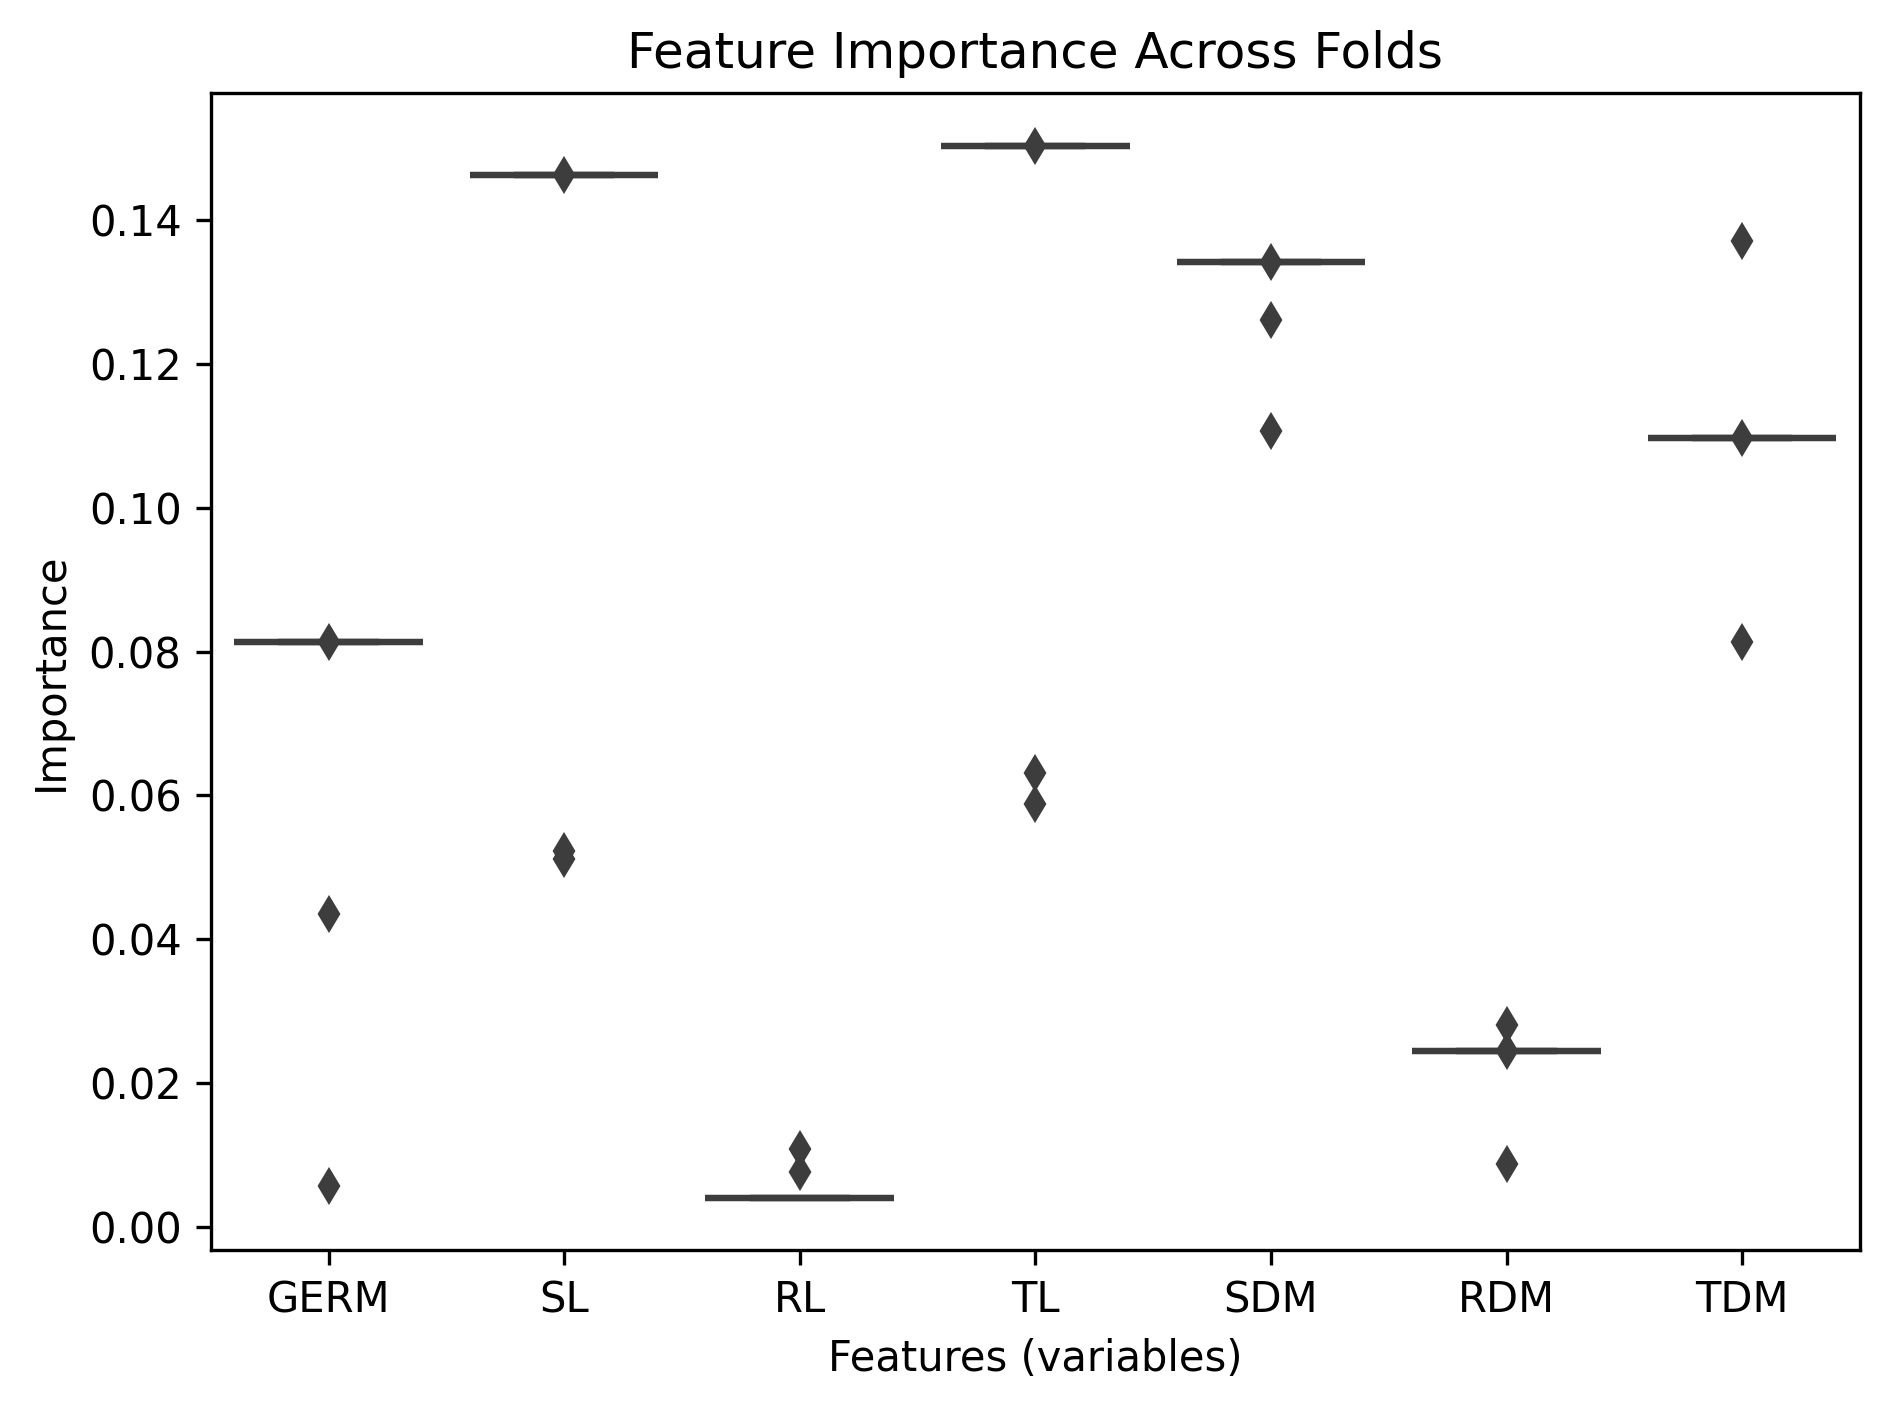

,GERM,SL,RL,TL,SDM,RDM,TDM
0,0.081302,0.146344,0.004065,0.150409,0.134148,0.024391,0.109758
1,0.005699,0.051150,0.007640,0.058789,0.110698,0.028101,0.081370
2,0.081302,0.146344,0.004065,0.150409,0.134148,0.024391,0.109758
3,0.043521,0.052225,0.010880,0.063105,0.126210,0.008704,0.137090
4,0.081302,0.146344,0.004065,0.150409,0.134148,0.024391,0.109758
5,0.081302,0.146344,0.004065,0.150409,0.134148,0.024391,0.109758
6,0.081302,0.146344,0.004065,0.150409,0.134148,0.024391,0.109758
7,0.081302,0.146344,0.004065,0.150409,0.134148,0.024391,0.109758
8,0.081302,0.146344,0.004065,0.150409,0.134148,0.024391,0.109758
9,0.081302,0.146344,0.004065,0.150409,0.134148,0.024391,0.109758


In [22]:
importances = np.array(importances)

# Create a DataFrame to hold feature importances
df = pd.DataFrame(importances, columns=['GERM', 'SL', 'RL', 'TL', 'SDM', 'RDM', 'TDM'])

# Plotting using Seaborn
plt.figure(dpi=300)
sns.boxplot(data=df)
plt.xlabel('Features (variables)')
plt.ylabel('Importance')
plt.title('Feature Importance Across Folds')
plt.tight_layout()
plt.show()

# Display the DataFrame
display(df)